# Photon Emission Protocol — Tree Graphs

Solve the photon-emission protocol for two tree-shaped graph states:

1. **Tree3_small** ($n = 10$) — a complete 3-ary tree built from branching vector `bv = [3, 3]`.
2. **Tree3** ($n = 40$) — a complete 3-ary tree built from branching vector `bv = [3, 3, 3]`.

In [1]:
import numpy as np

from emission import (
    StabilizerState,
    circuit_solver,
    protocol_executor,
    generators_equivalence,
    operation_to_quantikz,
    compile_quantikz_pdf,
    plot_graph,
    plot_height_function,
    circle_tree_layout,
)

In [2]:
def build_tree(bv):
    """Build a complete branching tree with the recursive interleaved ordering.

    Replicates the MATLAB ``BranchesVec2NodesVec`` / ``NodesVec2AdjMat``
    convention: subtrees are interleaved so that the depth-first traversal
    visits all branches at each level before descending.  This ordering
    minimises the height function (number of emitters).

    Returns (n, edges) where edges is a list of (parent, child) 0-indexed.
    """
    bv = list(bv)
    # Start: root (0) + bv[-1] children of root (parent = 1 in 1-indexed)
    nv = np.array([0] + [1] * bv[-1], dtype=int)

    for i in range(len(bv) - 2, -1, -1):
        L = len(nv) - 1
        b = bv[i]
        w = np.arange(1, b + 1) + np.arange(0, b) * L
        non_root = nv[1:]
        M = np.empty((L + 1, b), dtype=int)
        M[0, :] = 1
        for j in range(b):
            M[1:, j] = non_root + w[j]
        nv = np.concatenate([[0], M.flatten(order='F')])

    # Convert 1-indexed parent vector to 0-indexed edge list.
    edges = []
    for i in range(len(nv)):
        if nv[i] != 0:
            edges.append((int(nv[i] - 1), i))
    return len(nv), edges


def run_tree_example(n, edges, filename, pos=None):
    """Full pipeline: plot, solve, verify, quantikz+PDF, height function."""
    Gamma = np.zeros((n, n), dtype=np.int8)
    for i, j in edges:
        Gamma[i, j] = 1
        Gamma[j, i] = 1

    plot_graph(n, edges, title=f'{filename}  (n = {n})', pos=pos)

    gen = StabilizerState(np.eye(n, dtype=np.int8), Gamma, np.zeros(n, dtype=np.int8))
    op, inv_op, stat = circuit_solver(gen)
    print(f'  Photons: {stat["PhotonsNumber"]}, Emitters: {stat["EmittersNumber"]}')

    _, g_phi = protocol_executor(inv_op, stat['EmittersNumber'], stat['PhotonsNumber'])
    print('  Equivalence:', generators_equivalence(gen, g_phi))

    operation_to_quantikz(op, stat['PhotonsNumber'], stat['EmittersNumber'], filename)
    compile_quantikz_pdf(filename)

    plot_height_function(stat['HeightFunc'], title=f'{filename} — height function')
    print(f'  Height function h = {stat["HeightFunc"]}')
    return stat

## Example 1 — Tree3_small ($n = 10$)

Built with `build_tree([3,3])`: each node has 3 children, for 2 levels of branching.

Branching vector: [3, 3],  n = 13,  edges = 12


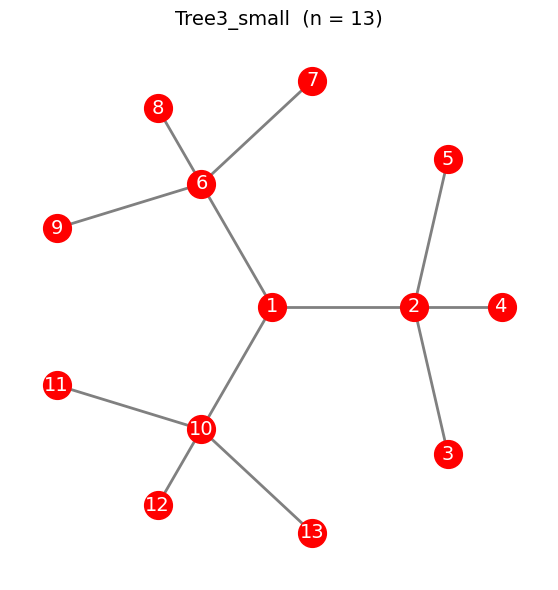

	** The protocol is SOLVED correctly! **
  Photons: 13, Emitters: 2
  Equivalence: {'Overall': True, 'Tableau': True, 'SignVector': True}
	** The quantikz code for latex has been saved as: quantikz_Tree3_small.txt **
	** PDF compiled: quantikz_Tree3_small.pdf **


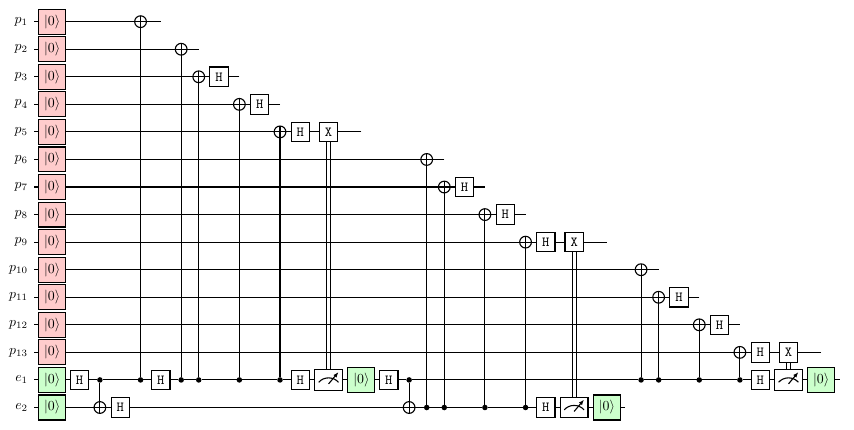

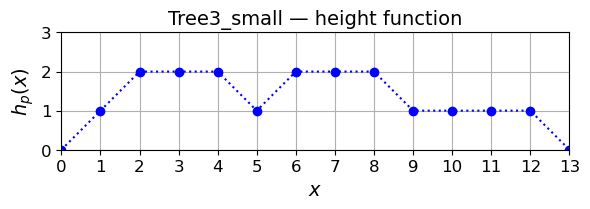

  Height function h = [0 1 2 2 2 1 2 2 2 1 1 1 1 0]


In [3]:
bv = [3, 3]
n, edges = build_tree(bv)
print(f'Branching vector: {bv},  n = {n},  edges = {len(edges)}')
pos = circle_tree_layout(bv)
stat1 = run_tree_example(n, edges, 'Tree3_small', pos=pos)

## Example 2 — Complete 3-ary tree ($n = 40$)

Built with `build_tree([3,3,3])`: each node has 3 children, for 3 levels of branching.

Branching vector: [3, 3, 3],  n = 40,  edges = 39


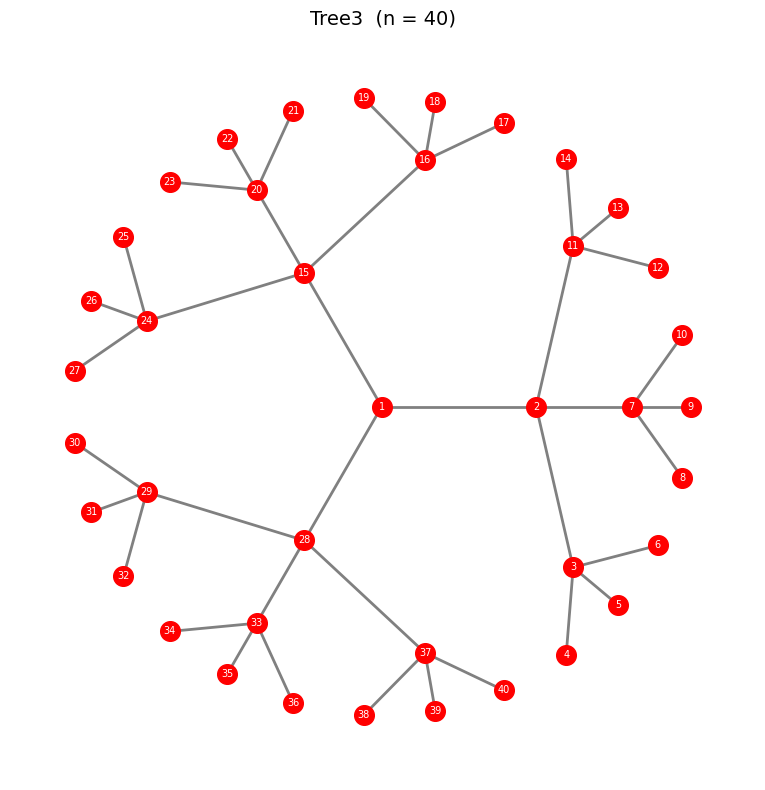

	** The protocol is SOLVED correctly! **
  Photons: 40, Emitters: 3
  Equivalence: {'Overall': True, 'Tableau': True, 'SignVector': True}
	** The quantikz code for latex has been saved as: quantikz_Tree3.txt **
	** PDF compiled: quantikz_Tree3.pdf **


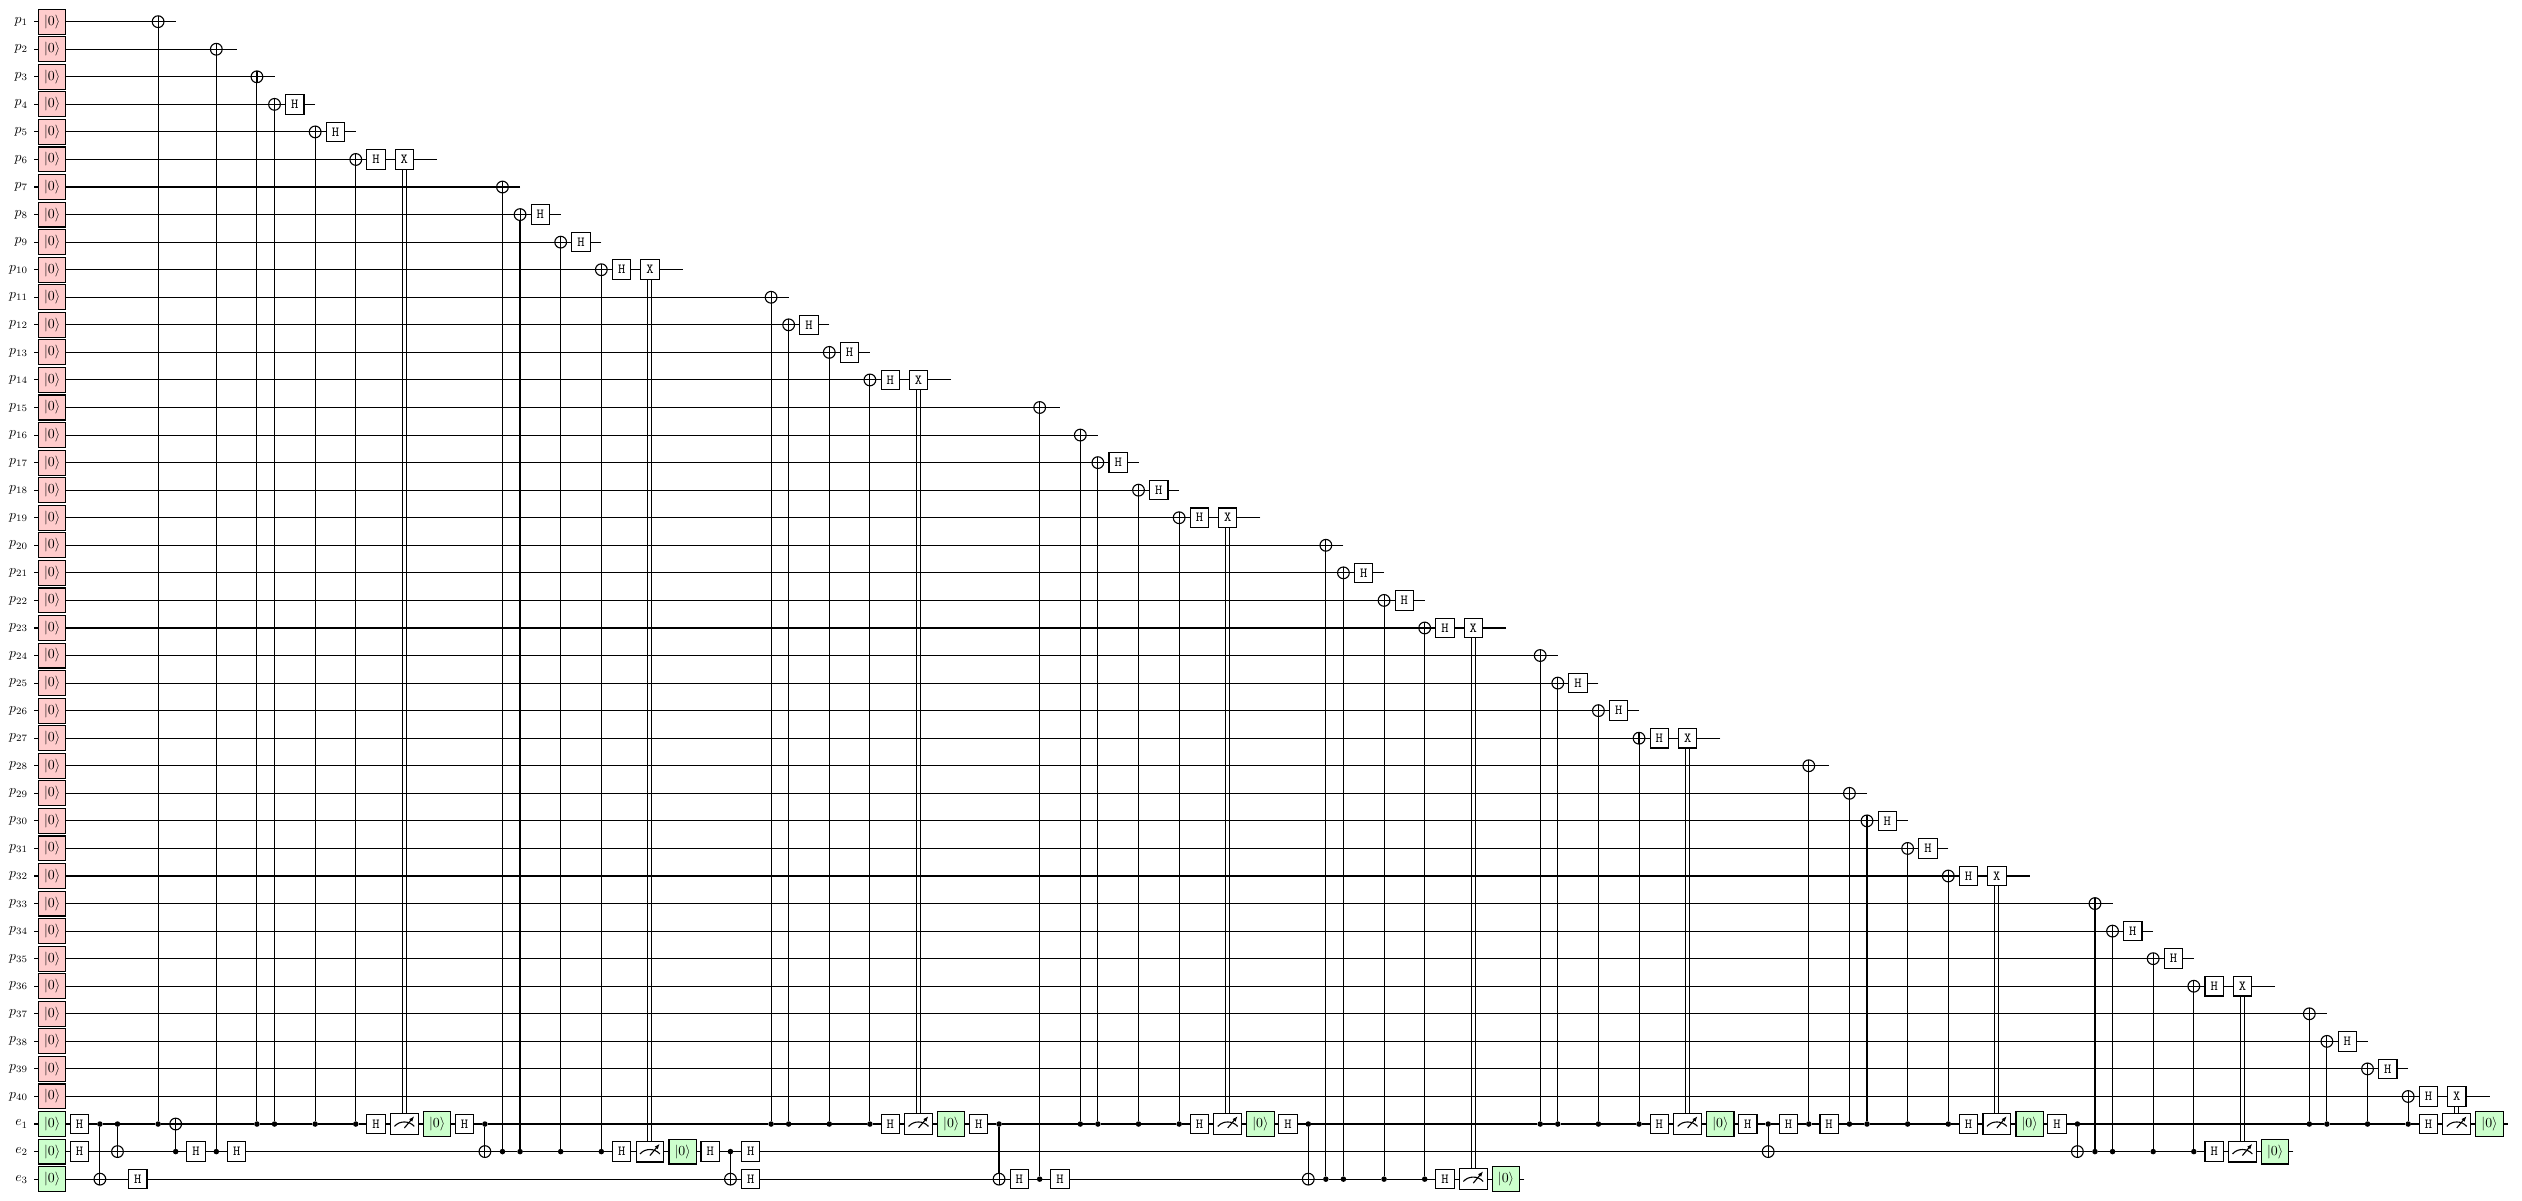

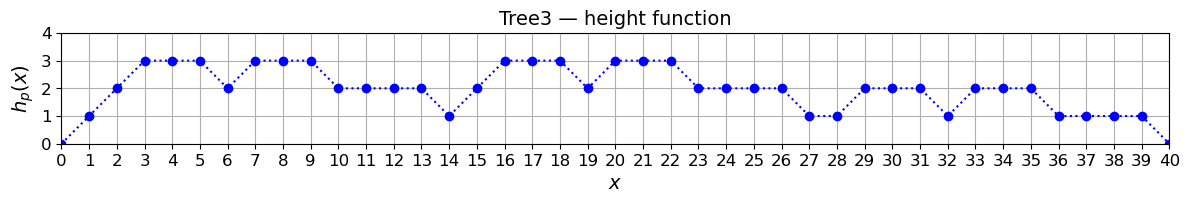

  Height function h = [0 1 2 3 3 3 2 3 3 3 2 2 2 2 1 2 3 3 3 2 3 3 3 2 2 2 2 1 1 2 2 2 1 2 2 2 1
 1 1 1 0]


In [4]:
bv = [3, 3, 3]
n, edges = build_tree(bv)
print(f'Branching vector: {bv},  n = {n},  edges = {len(edges)}')
pos = circle_tree_layout(bv)
stat2 = run_tree_example(n, edges, 'Tree3', pos=pos)